Encoding categorical veriables :-
 There are two type of encoding :-
  1. Nominal :-
                1. One Hot Encoding 
     
  2. Ordinal :-
                1. Label Encoding
                2. Ondinal Encoding
  


# Ordinal Encoding

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('C:\\Users\\AmiteshOP\\feature engineering\\customer.csv')

In [4]:
df.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [6]:
df=df.iloc[:,2:]

In [7]:
df.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [15]:
df.education.unique()

array(['School', 'UG', 'PG'], dtype=object)

In [9]:
df.shape

(50, 3)

In [8]:
X = df.drop('purchased',axis=1)
y= df['purchased']

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [14]:
X_train.shape , X_test.shape

((35, 2), (15, 2))

In [17]:
# OdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
od=OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])
od.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [19]:
X_train_new = od.transform(X_train)
X_test_new = od.transform(X_test)

In [21]:
X_train_new

array([[0., 0.],
       [0., 2.],
       [0., 2.],
       [2., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [2., 2.],
       [1., 0.],
       [0., 2.],
       [1., 1.],
       [1., 0.],
       [2., 0.],
       [1., 0.],
       [0., 1.],
       [2., 0.],
       [2., 1.],
       [0., 1.],
       [0., 0.],
       [1., 2.],
       [1., 2.],
       [2., 0.],
       [2., 0.],
       [2., 1.],
       [1., 2.],
       [0., 2.],
       [2., 1.],
       [0., 2.],
       [0., 2.],
       [2., 2.],
       [1., 0.],
       [2., 2.],
       [1., 1.]])

In [22]:
X_train_new=pd.DataFrame(X_train_new,columns=X.columns)
X_test_new=pd.DataFrame(X_test_new,columns=X.columns)

In [24]:
X_train_new

,review,education
0,0.0,0.0
1,0.0,2.0
2,0.0,2.0
3,2.0,1.0
4,1.0,1.0
5,0.0,1.0
6,1.0,1.0
7,1.0,1.0
8,0.0,1.0
9,2.0,2.0


In [25]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [26]:
y_train_new=le.transform(y_train)
y_test_new=le.transform(y_test)

In [30]:
y_train_new

dtype('int32')

In [35]:
y_train_new=pd.DataFrame(data=y_train_new).rename(columns={0:'purchased'})

In [37]:
y_train_new.shape

(35, 1)

In [39]:
y_test_new=pd.DataFrame(data=y_test_new).rename(columns={0:'purchased'})

In [40]:
y_test_new

,purchased
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,1
8,1
9,0


In [41]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [42]:
st.fit(X_train_new)

StandardScaler()

In [45]:
X_train_scaler = st.transform(X_train_new)
X_test_scaler=X_test_scaler = st.transform(X_test_new)

In [46]:
X_train_scaler = pd.DataFrame(X_train_scaler,columns=X.columns)
X_test_scaler=pd.DataFrame(X_test_scaler,columns=X.columns)

In [48]:
X_test_scaler

,review,education
0,-1.199088,-1.336864
1,1.269622,-0.072263
2,1.269622,-0.072263
3,1.269622,1.192338
4,1.269622,1.192338
5,-1.199088,1.192338
6,1.269622,-1.336864
7,-1.199088,-1.336864
8,-1.199088,1.192338
9,0.035267,-0.072263


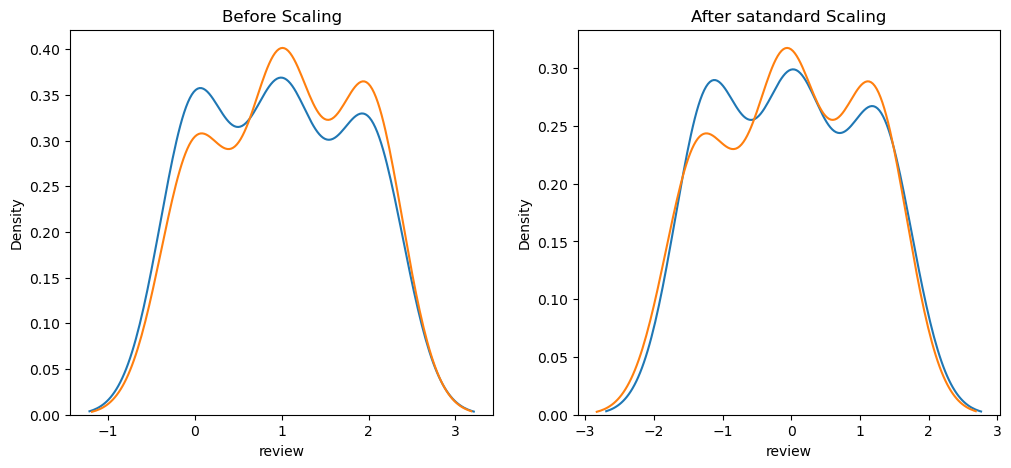

In [63]:
fig ,(ax1 ,ax2) =plt.subplots(ncols=2,figsize=(12,5))
# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_new['review'], ax=ax1)
sns.kdeplot(X_train_new['education'], ax=ax1)

# after standard scaling
ax2.set_title('After satandard Scaling')
sns.kdeplot(X_train_scaler['review'], ax=ax2)
sns.kdeplot(X_train_scaler['education'], ax=ax2)
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [52]:
lg.fit(X_train_scaler,y_train_new)

C:\Users\AmiteshOP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [53]:
y_pred = lg.predict(X_test_scaler)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_new,y_pred)

0.5333333333333333

In [64]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [65]:
lr.fit(X_train_scaler,y_train_new)

LinearRegression()

In [68]:
y_pred = lr.predict(X_test_scaler)
accuracy_score(y_test_new,y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets